<a href="https://colab.research.google.com/github/PryDatar/GymProgressTracker/blob/main/ProgressWorkout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gspread
!pip install openpyxl

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [15]:
worksheet = gc.open('TrackingSalle').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

import pandas as pd
data = pd.DataFrame.from_records(rows)
data.columns = data.iloc[0]
data = data[1:]

data

,Jour Pecs,Bench,Incliné,Pec FLy,Dips,,Jour Epaules,Presse,Butterfly,Elevations Lat,...,Jour Triceps,Couché,Poulie Haute,Dips,,Jour Dos,Tractions,Horizontal,Abs Inversés,Rowing
1,18/10/23,9 8 6 6 5 : 60,11 10 10 10 9 : 32,11 : 28 12 10 9 9 : 23,9 8 6 6 4 : 75,,,,,,...,,,,,,,,,,


In [34]:
import numpy as np

dataPecs = data.iloc[:, :4]
dataEpaules = data.iloc[:, 6:10]
dataBiceps = data.iloc[:, 11:15]
dataTriceps = data.iloc[:, 16:20]
dataDos = data.iloc[:, 21:26]

In [35]:
dataPecs

,Jour Pecs,Bench,Incliné,Pec FLy
1,18/10/23,9 8 6 6 5 : 60,11 10 10 10 9 : 32,11 : 28 12 10 9 9 : 23


In [36]:
dataEpaules

,Jour Epaules,Presse,Butterfly,Elevations Lat
1,,,,


In [37]:
dataBiceps

,Jour Biceps,Preacher,Hammer,Incliné
1,,,,


In [38]:
dataTriceps

,Jour Triceps,Couché,Poulie Haute,Dips
1,,,,


In [39]:
dataDos

,Jour Dos,Tractions,Horizontal,Abs Inversés,Rowing
1,,,,,


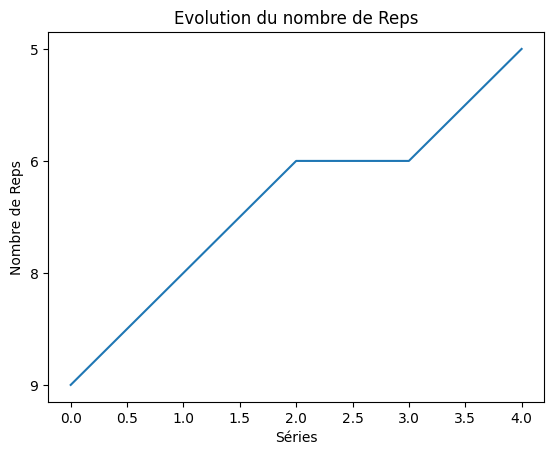

In [56]:
import matplotlib.pyplot as plt

def printLists(listes):
  for sublist in listes:
    plt.plot(sublist)
    # Ajouter des étiquettes aux axes et un titre
  plt.xlabel('Séries')
  plt.ylabel('Nombre de Reps')
  plt.title('Evolution du nombre de Reps')
  plt.show()

def graphExo(df, label):
  tmp = df.Bench
  series = []
  for s in tmp:
    t = s.split(' ')
    serie = t[:5]
    series.append(serie)
  printLists(series)

graphExo(dataPecs, "Bench")